# data preprocessing





In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/data (1).csv')

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [5]:
df.shape

(2227, 3)

## since there are minute values which are having null value we can drop them
## But lets try to fill them with certain value it can be


*   fill with global constant(say 0)
*   fill with the mean value of the values of the feature
*   forward fill (method=ffill),i.e fill the missing value with the value above it
*   backword fill (method=bfill),i.e fil the missing value with the value below it



### so here iam using ffill method

In [7]:
## filling missing values
df.fillna(method='ffill',inplace=True)

In [8]:
df.isnull().any()

x1    False
x2    False
y     False
dtype: bool

In [10]:
df.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.788406,8.935573e+04,0.442299
std,74.951439,2.981313e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.713542,-8.025966e+01,0.000000
50%,-9.750840,-1.000000e+00,0.000000
75%,59.753752,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


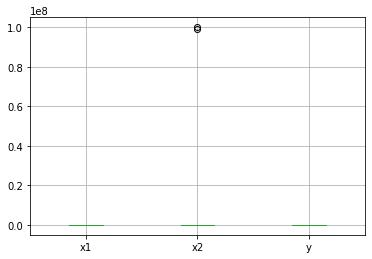

In [11]:
df.boxplot()

### here we can find outliers in x2 feature let's try to remove it


*  let's replace the values more than Q3 value with Q3 and values less than Q1 with Q1




In [16]:
import numpy as np
df['new_x1']=np.where(df['x1']>=59.753752,59.753752,df['x1'])
df['new_x1']=np.where(df['x1']<=-71.713542,-71.713542,df['x1'])

Text(0.5, 1.0, 'without outliers')

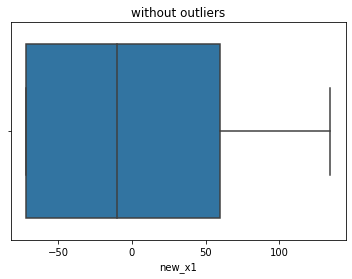

In [17]:
import seaborn as sns
sns.boxplot(x=df['new_x1']).set_title("without outliers")

In [14]:
df['new_x2']=np.where(df['x2']>=6.390448e+01,6.390448e+01,df['x2'])

Text(0.5, 1.0, 'without outliers')

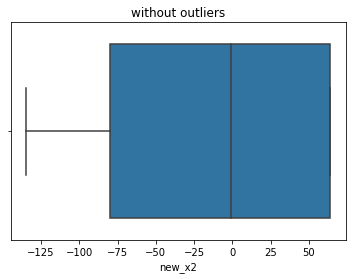

In [15]:
sns.boxplot(x=df['new_x2']).set_title("without outliers")

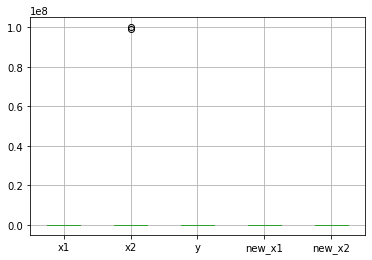

In [18]:
df.boxplot()

### lets drop the old features

In [19]:
df.drop(columns=['x1','x2'],inplace=True)

In [22]:
df.head(1)

,y,new_x1,new_x2
0,1,-71.713542,63.90448


In [21]:
df.describe()

,y,new_x1,new_x2
count,2227.000000,2227.000000,2227.000000
mean,0.442299,2.033634,-14.245636
std,0.496771,66.337356,70.087089
min,0.000000,-71.713542,-134.876132
25%,0.000000,-71.670053,-80.259658
50%,0.000000,-9.750840,-1.000000
75%,1.000000,59.753752,63.890862
max,1.000000,134.508687,63.904480


In [35]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

# Data Visualization

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


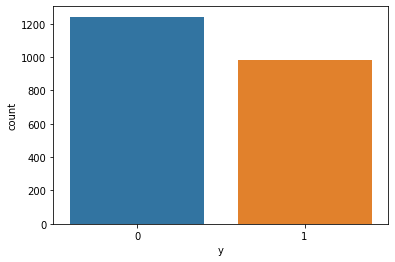

In [24]:
sns.countplot(df['y'])

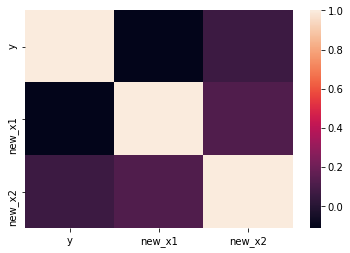

In [54]:
sns.heatmap(df.corr())

### There is a good ratio between output labels therfore no need for handling these data 
### It is balanced :)

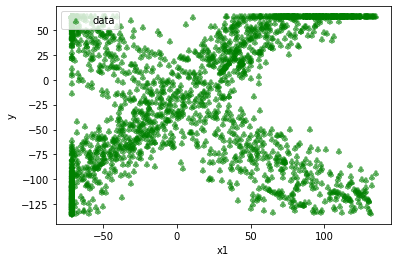

<Figure size 720x720 with 0 Axes>

In [34]:


plt.scatter(x=df['new_x1'], y=df['new_x2'], c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="data")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend(loc='upper left')
plt.figure(figsize=(10,10))
plt.show()

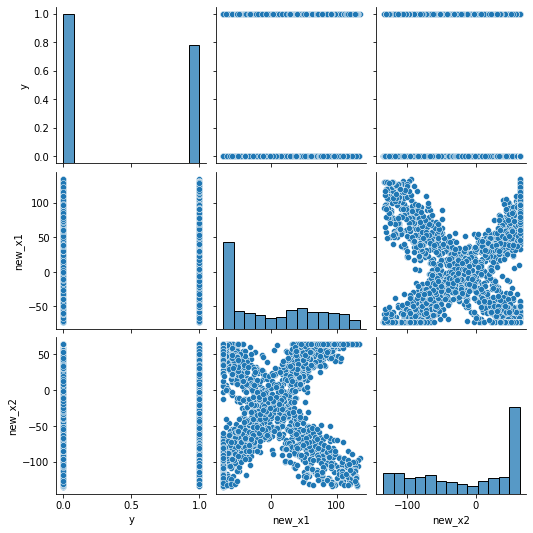

In [31]:
sns.pairplot(df)

In [36]:
x1=df['new_x1']
x2=df['new_x2']
y=df['y']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


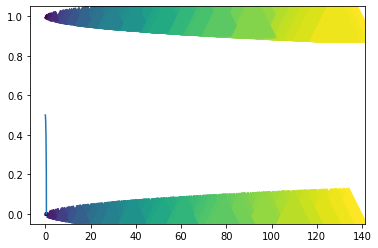

In [38]:
area = (20 * x1  )
r0=0.5
c = np.sqrt(area)
r = np.sqrt(x1 ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x1, y, s=area1, marker='^', c=c)
plt.scatter(x1, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

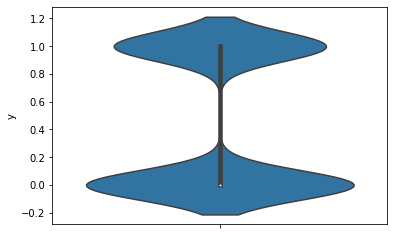

In [41]:
sns.violinplot (y=y)

# Data Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [43]:
x=df.iloc[:,[1,2]].values
y=df.iloc[:,[0]].values

In [44]:
x.shape,y.shape

((2227, 2), (2227, 1))

In [45]:
x=ss.fit_transform(x)

# Data Modelling

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

#Logistic Regression

In [49]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
lr_pred=lr.predict(x_test)
confusion_matrix(y_test,lr_pred)


array([[366,   0],
       [158, 145]])

In [53]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       366
           1       1.00      0.48      0.65       303

    accuracy                           0.76       669
   macro avg       0.85      0.74      0.73       669
weighted avg       0.84      0.76      0.74       669



# SVM kernel=linear

In [55]:
sv=svm.SVC(C=1.0, kernel='linear')

In [56]:
sv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
sv_pred=sv.predict(x_test)
confusion_matrix(y_test,sv_pred)

array([[366,   0],
       [155, 148]])

In [58]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       366
           1       1.00      0.49      0.66       303

    accuracy                           0.77       669
   macro avg       0.85      0.74      0.74       669
weighted avg       0.84      0.77      0.75       669



# SVM kernel=Rbf

In [60]:
sv1=svm.SVC(C=1.0, kernel='rbf')

In [61]:
sv1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
sv1_pred=sv1.predict(x_test)
confusion_matrix(y_test,sv1_pred)

array([[355,  11],
       [ 19, 284]])

In [63]:
print(classification_report(y_test,sv1_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       366
           1       0.96      0.94      0.95       303

    accuracy                           0.96       669
   macro avg       0.96      0.95      0.95       669
weighted avg       0.96      0.96      0.96       669



# Decision Tree

In [64]:
tr=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=7, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

In [65]:
tr.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
tr_pred=tr.predict(x_test)
confusion_matrix(y_test,tr_pred)

array([[362,   4],
       [ 42, 261]])

In [67]:
print(classification_report(y_test,tr_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       366
           1       0.98      0.86      0.92       303

    accuracy                           0.93       669
   macro avg       0.94      0.93      0.93       669
weighted avg       0.94      0.93      0.93       669



KNN(K nearest neighbors)

In [69]:
knn=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [70]:
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
knn_pred=knn.predict(x_test)
confusion_matrix(y_test,knn_pred)

array([[352,  14],
       [ 17, 286]])

In [72]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       366
           1       0.95      0.94      0.95       303

    accuracy                           0.95       669
   macro avg       0.95      0.95      0.95       669
weighted avg       0.95      0.95      0.95       669



# HyperParamter Tunning

## Logistic regression

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(lr, param_grid)


In [77]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
clf.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
lr1=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
lr1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
lr1_pred=lr1.predict(x_test)

In [84]:
print(classification_report(y_test,lr1_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       366
           1       1.00      0.48      0.65       303

    accuracy                           0.76       669
   macro avg       0.85      0.74      0.73       669
weighted avg       0.84      0.76      0.74       669



SVM kernel=linear

In [85]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(sv, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.760, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.759, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.752, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.759, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.752, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.752, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.759, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.752, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.782, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.759, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.752, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.782, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.782, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ......... C=1, gamma=1, kernel=linear, score=0.760, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.759, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.752, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.782, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.782, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.760, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.759, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.752, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.782, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.782, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.760, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.759, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.752, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.782, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.782, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.760, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.759, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.752, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.782, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.782, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.760, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.759, total=   0.1s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.752, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=1, kernel=linear, score=0.782, total=   0.2s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.782, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=1, kernel=linear, score=0.760, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.759, total=   0.2s
[CV] C=10, gamma=1, kernel=linear ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=1, kernel=linear, score=0.752, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.782, total=   0.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.782, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.760, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.759, total=   0.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.752, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.782, total=   0.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.782, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.760, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.759, total=   0.2s
[CV] C=10, gamma=0.01, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.752, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.782, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=10, gamma=0.001, kernel=linear, score=0.782, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.760, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=10, gamma=0.001, kernel=linear, score=0.759, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.752, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.782, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.782, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.760, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.759, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.752, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.760, total=   0.8s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.759, total=   0.8s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=1, kernel=linear, score=0.752, total=   0.8s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.760, total=   0.8s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.759, total=   0.8s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.752, total=   0.8s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.760, total=   0.8s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.759, total=   0.8s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=100, gamma=0.01, kernel=linear, score=0.752, total=   0.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.760, total=   0.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.759, total=   0.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=100, gamma=0.001, kernel=linear, score=0.752, total=   0.8s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.782, total=   0.8s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.760, total=   0.8s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.759, total=   0.8s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.752, total=   0.8s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.782, total=   7.4s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.782, total=   7.2s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.760, total=   6.5s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.759, total=   7.3s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=1, kernel=linear, score=0.752, total=   7.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.782, total=   7.4s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.782, total=   7.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.760, total=   6.5s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.759, total=   7.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.752, total=   7.1s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.782, total=   7.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.782, total=   7.2s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.760, total=   6.5s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.759, total=   7.3s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.752, total=   7.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.782, total=   7.4s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.782, total=   7.2s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.760, total=   6.5s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.759, total=   7.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.752, total=   7.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.782, total=   7.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.782, total=   7.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.760, total=   6.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.759, total=   7.3s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.752, total=   7.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [86]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
sv11=svm.SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
sv11.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
sv11_pred=sv11.predict(x_test)

In [90]:
print(classification_report(sv11_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83       521
           1       0.49      1.00      0.66       148

    accuracy                           0.77       669
   macro avg       0.74      0.85      0.74       669
weighted avg       0.89      0.77      0.79       669



SVM kernel=rbf

In [92]:
param_grid = {'C': [0.1, 1, 10,100,1000], 
              'gamma': [1, 0.1, 0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(sv, param_grid)
grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
sv12=svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [95]:
sv12.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
sv12_pred=sv12.predict(x_test)

In [97]:
print(classification_report(y_test,sv12_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       366
           1       0.95      0.97      0.96       303

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



# Decisiontree

In [106]:
random_grid = {
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10]
               }

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
tr.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [107]:
search=RandomizedSearchCV(tr,random_grid,cv=4)

In [108]:
search.fit(x_train,y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=10,
                                                    max_features=None,
                                                    max_leaf_nodes=7,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
               

In [109]:
search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
tr1=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
tr1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
tr1_pred=tr1.predict(x_test)

In [113]:
print(classification_report(y_test,tr1_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       366
           1       0.71      0.80      0.75       303

    accuracy                           0.76       669
   macro avg       0.76      0.76      0.76       669
weighted avg       0.77      0.76      0.76       669



#KNN

In [114]:
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

In [115]:
grid_search_KNN = GridSearchCV(
    estimator=knn,
    param_grid=parameters_KNN,
    
)

In [116]:
grid_search_KNN.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
grid_search_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [118]:
knn1=KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [119]:
knn1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [120]:
knn1_pred=knn1.predict(x_test)

In [121]:
print(classification_report(y_test,knn1_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       366
           1       0.96      0.93      0.95       303

    accuracy                           0.95       669
   macro avg       0.95      0.95      0.95       669
weighted avg       0.95      0.95      0.95       669



# OBSERVATION REPORT 

In [122]:
from sklearn.metrics import accuracy_score

In [125]:
## Accuracy scores
print('accuracy score of Logistic regression is ',accuracy_score(y_test,lr_pred))
print('accuracy score of SVM(linear) is ',accuracy_score(y_test,sv_pred))
print('accuracy score of SVM(rbf) is ',accuracy_score(y_test,sv1_pred))
print('accuracy score of Decision tree is ',accuracy_score(y_test,tr_pred))
print('accuracy score of KNN is ',accuracy_score(y_test,knn_pred))

accuracy score of Logistic regression is  0.7638266068759342
accuracy score of SVM(linear) is  0.7683109118086696
accuracy score of SVM(rbf) is  0.9551569506726457
accuracy score of Decision tree is  0.9312406576980568
accuracy score of KNN is  0.953662182361734


In [133]:

a=accuracy_score(y_test,lr_pred)
b=accuracy_score(y_test,sv_pred)
c=accuracy_score(y_test,sv1_pred)
d=accuracy_score(y_test,tr_pred)
e=accuracy_score(y_test,knn_pred)
scores=[a,b,c,d,e]

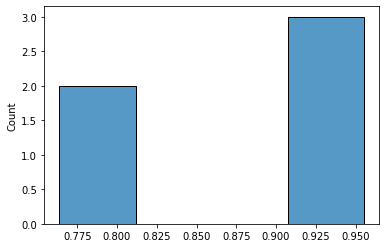

In [135]:
sns.histplot(scores)

## We can observe that KNN and SVM(kernel=rbf) are giving good accuracy
## i.e knn is giving accuracy of 0.95
## i.e SVM(kernel=rbf) is giving accuracy of 0.96

## with this we can conclude that support vector machine with 'rbf' kernel gives us the better results for the given data